In [1]:
from tkinter import font
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats

In [2]:
# 讀檔
csv = "../csv/400Hz_normal_2022_03_11_14_59_28.csv"
data = pd.read_csv(csv)
# 生成分群圖的檔名（這邊是切出赫茲）
hz = csv.split("_")[0].split("/")[2]

print(hz)
print(data)

400Hz
        sequence  channel_0
0              0      -1311
1              1       1005
2              2       2198
3              3      -2171
4              4      -1602
...          ...        ...
910795    910795      10787
910796    910796      29167
910797    910797      20173
910798    910798      24641
910799    910799     -11458

[910800 rows x 2 columns]


In [3]:
# 把名為 sequence 的欄位，從資料表中移除（ inplace = True 為從正本移除，非副本移除 ）
data.drop(["sequence"], axis = 1, inplace = True)

In [4]:
# 計算資料筆數，並生成序列（為了後面分群圖的呈現，也就是 X 軸）
col_count = len(data)

col_countList = []
for i in range(col_count):
    col_countList.append(i)

print(len(col_countList))

910800


[217622447741531.4, 68387764278036.42, 33075287077536.555, 20259425082670.973, 12837484487512.93, 9078786658147.828, 6632496884721.965, 5051474147750.33, 3981430212454.585]


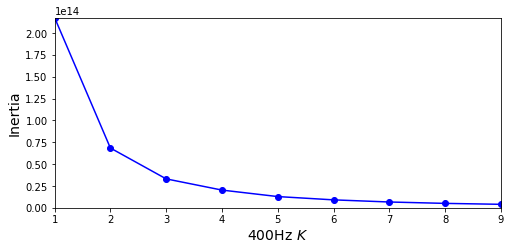

In [5]:
# 測試 K = 1~9，選擇迅速下降轉為平緩的點（手肘法）
kmeans_list = [KMeans(n_clusters=k).fit(data)
               for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]
print(inertias)

# 這裡就畫圖
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel(f"{hz} $K$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 9, 0, inertias[0]])
plt.show()

In [6]:
# 設定分群數，k值就是分群數
k = 3

In [7]:
# 單跑一次，並評估平均值，且預測
kmeansModel = KMeans(n_clusters=k)
clusters_pred = kmeansModel.fit_predict(data)

# 每個點到其他叢集的質心的距離之和
print(kmeansModel.inertia_)

# 特徵的中心點
print(kmeansModel.cluster_centers_)

# 這邊也是執行預測，跟該列第一行一樣
y_means = kmeansModel.predict(data)

print(y_means)

33066414768770.22
[[-19063.14926208]
 [ 17735.0408437 ]
 [   445.18735266]]
[2 2 2 ... 1 1 0]


In [8]:
# hcluster = cluster.AgglomerativeClustering(
#     linkage="word", affinity="euclidean", n_clusters=3)

# hcluster.fix(data)
# cluster_label = hcluster.labels_
# print(cluster_label)
# print("------------")

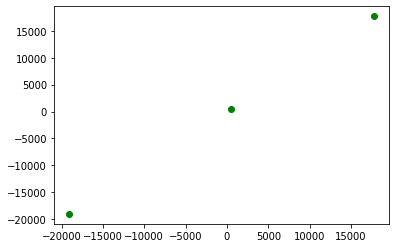

In [9]:
# 將 k 個特徵中心點畫在圖上
plt.scatter(kmeansModel.cluster_centers_[:,0], kmeansModel.cluster_centers_[:,:],
            c="g")

/var/folders/25/ycj24rw97dq9s4_ylj83kprw0000gn/T/ipykernel_86781/3025415922.py:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(f"image/{hz}_KMeans_k_{k}.png", dpi = 100, bbox_inches = "tight", pad_inches = 1, facecolor="w", edgecolor = "b", transparent = False, linewidth = 5)


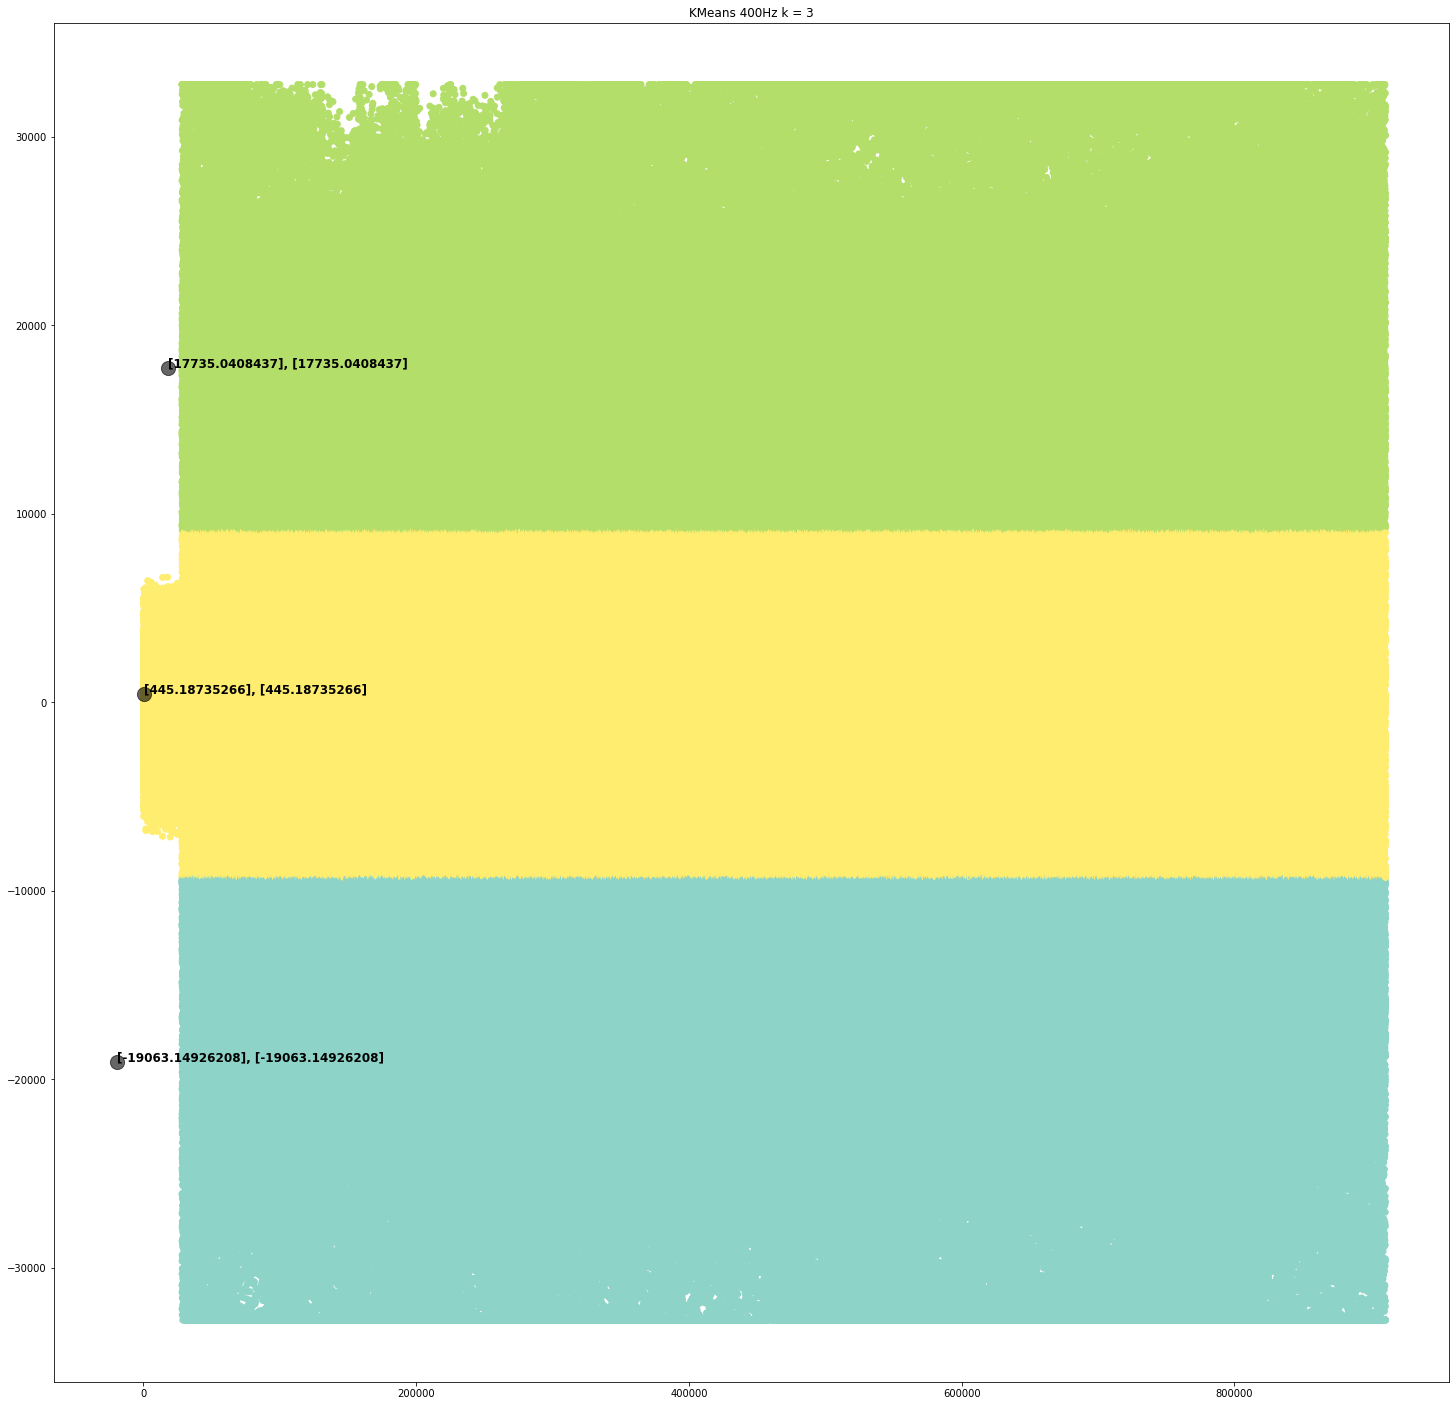

In [10]:
# 圖像呈現模式
fig = plt.gcf()

# 圖片尺寸（英吋還是英尺，忘記ㄌ）
fig.set_size_inches(25, 25)

# 如果要產多個小圖，可以unlock這個
# plt.subplot(222) 

plt.title(f'KMeans {hz} k = {k}')
# 將原資料集數據成圖
plt.scatter(col_countList, data, c=y_means, cmap=plt.cm.Set3)
# 加上K個特徵中心點
plt.scatter(kmeansModel.cluster_centers_[:,:], kmeansModel.cluster_centers_[:,:], color='black', s=200, alpha=0.6)

# 標上各分組中心點座標
for i in range(kmeansModel.cluster_centers_.shape[0]): 
    plt.text(kmeansModel.cluster_centers_[i], kmeansModel.cluster_centers_[i], str(f"{kmeansModel.cluster_centers_[i]}, {kmeansModel.cluster_centers_[i]}"),
             fontdict={'color': 'black', 'weight': 'bold', 'size': 12})

# 存檔並呈現（這裡出現紅色報錯屬正常現象）
fig.savefig(f"image/{hz}_KMeans_k_{k}.png", dpi = 100, bbox_inches = "tight", pad_inches = 1, facecolor="w", edgecolor = "b", transparent = False, linewidth = 5)
plt.show()

In [11]:
# silhouette_score = [silhouette_score(data, model.labels_)
#                     for model in kmeans_list[1:]]

# print("\f")
# print(silhouette_score)

# sns.lmplot("channel_0", hue="channel_0", data=data, fit_reg=False)

In [12]:
print(kmeansModel.inertia_/col_count)

36304803.215601906
